In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

from scipy.io import loadmat
from matplotlib.ticker import MaxNLocator

In [2]:
# Define fonts and fontsize for plotting
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
fontsize = 15

In [3]:
# Define necessary functions
# Function to get displacement and void data
def get_data(file_directory, void_number):

    # Load the displacement data
    training_displacement_data = loadmat(os.path.join(file_directory, f'void_{void_number}_training_displacement_data_normalized.mat'))['displacement_data']
    validation_displacement_data = loadmat(os.path.join(file_directory, f'void_{void_number}_validation_displacement_data_normalized.mat'))['displacement_data']

    # Load the void data
    training_void_data = loadmat(os.path.join(file_directory, f'void_{void_number}_training_void_data.mat'))['void_data']
    validation_void_data = loadmat(os.path.join(file_directory, f'void_{void_number}_validation_void_data.mat'))['void_data']

    return training_displacement_data, validation_displacement_data, training_void_data, validation_void_data

In [4]:
# CNN class
class CNN():

    def __init__(self, input_shape, output_shape):
        
        self.input_shape = input_shape
        self.output_shape = output_shape
        
        # Initialize input_layer here
        self.input_layer = None  

    # Method to build the hidden layers
    def build_hidden_layers(self):
        
        # Convolutional Layers
        # First Convolutional Layer
        x1 = tf.keras.layers.Conv1D(filters=160, kernel_size=70, padding='same', activation='relu', kernel_initializer = 'glorot_normal')(self.input_layer)
        x1 = tf.keras.layers.BatchNormalization()(x1)

        # Second Convolutional Layer
        x2 = tf.keras.layers.Conv1D(filters=90, kernel_size=70, padding='same', activation='relu', kernel_initializer = 'glorot_normal')(x1)
        x2 = tf.keras.layers.BatchNormalization()(x2)
        
        # Third Convolutional Layer
        x3 = tf.keras.layers.Conv1D(filters=120, kernel_size=70, padding='same', activation='relu', kernel_initializer = 'glorot_normal')(x2)
        x3 = tf.keras.layers.BatchNormalization()(x3)

        # Fourth Convolutional Layer
        x4 = tf.keras.layers.Conv1D(filters=90, kernel_size=70, padding='same', activation='relu', kernel_initializer = 'glorot_normal')(x3)
        x4 = tf.keras.layers.BatchNormalization()(x4)

        # Fifth Convolutional Layer
        x5 = tf.keras.layers.Conv1D(filters=170, kernel_size=70, padding='same', activation='relu', kernel_initializer = 'glorot_normal')(x4)
        x5 = tf.keras.layers.BatchNormalization()(x5)

        # Sixth Convolutional Layer
        x6 = tf.keras.layers.Conv1D(filters=190, kernel_size=70, padding='same', activation='relu', kernel_initializer = 'glorot_normal')(x5)
        x6 = tf.keras.layers.BatchNormalization()(x6)

        # Seventh Convolutional Layer
        x7 = tf.keras.layers.Conv1D(filters=70, kernel_size=70, padding='same', activation='relu', kernel_initializer = 'glorot_normal')(x6)
        x7 = tf.keras.layers.BatchNormalization()(x7)

        # Eighth Convolutional Layer
        x8 = tf.keras.layers.Conv1D(filters=190, kernel_size=70, padding='same', activation='relu', kernel_initializer = 'glorot_normal')(x7)
        x8 = tf.keras.layers.BatchNormalization()(x8)

        # Ninth Convolutional Layer
        x9 = tf.keras.layers.Conv1D(filters=20, kernel_size=70, padding='same', activation='relu', kernel_initializer = 'glorot_normal')(x8)
        x9 = tf.keras.layers.BatchNormalization()(x9)

        return x9

    # Method to build the overall model
    def build_model(self):
        
        # Input layer
        self.input_layer = tf.keras.layers.Input(shape=self.input_shape)

        # Hidden layer
        hidden_layer = self.build_hidden_layers()

        # Add a flatten layer
        flatten_layer = tf.keras.layers.Flatten()(hidden_layer)

        # Output Layer
        output_layer = tf.keras.layers.Dense(units=self.output_shape, activation='sigmoid')(flatten_layer)

        # Build model
        self.model = tf.keras.models.Model(inputs=[self.input_layer], outputs=[output_layer])

        return self.model

    # Method to compile the model
    def compile(self, optimizer, loss, evaluation_metric):
        
        # Compile model
        self.model.compile(optimizer=optimizer, loss=loss, metrics=evaluation_metric)

        return self.model
    
    # Define method to train the model
    def train(self, x_train, y_train, x_val, y_val, epochs, batch_size, callbacks):
        
        # Train model
        self.history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=callbacks,
                                      validation_data=(x_val, y_val))
        
        return self.history
    
    # Method to print summary of model
    def summary(self):
        
        self.model.summary()

In [5]:
class plots:
    
    def __init__(self, history, file_directory):

        self.history = history
        self.file_directory = file_directory

    def loss(self):

        loss_name = list(self.history.history.keys())[0]

        # Training
        loss = self.history.history[loss_name]
        val_loss = self.history.history['val_' + loss_name]

        loss_plot = plt.figure()
        epochs = range(1, len(loss)+1)
        plt.plot(epochs, loss, 'bo--', label = 'Training Loss', markersize = 2)
        plt.plot(epochs, val_loss, 'go--', label = 'Validation Loss', markersize = 2)
        plt.title('Training and Validation Loss', fontsize=fontsize)
        plt.xlabel('Epochs', fontsize=fontsize)
        plt.ylabel('Loss', fontsize=fontsize)
        plt.legend(['Training Loss', 'Validation Loss'], fontsize=fontsize)
        ax = loss_plot.gca()
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        plt.savefig(self.file_directory + '/loss.pdf', bbox_inches='tight')
        
        return loss_plot

    def evaluation_metric(self):

        metric_name = list(self.history.history.keys())[1]
        
        # Training
        metric = self.history.history[metric_name]
        val_metric = self.history.history['val_' + metric_name]

        metric_plot = plt.figure()
        epochs = range(1, len(metric)+1)
        plt.plot(epochs, metric, 'bo--', label = 'Training Metric', markersize = 2)
        plt.plot(epochs, val_metric, 'go--', label = 'Validation Metric', markersize = 2)
        plt.title('Training and Validation Evaluation Metric', fontsize=fontsize)
        plt.xlabel('Epochs', fontsize=fontsize)
        plt.ylabel('Evaluation Metric', fontsize=fontsize)
        plt.legend(['Training Metric', 'Validation Metric'], fontsize=fontsize)
        ax = metric_plot.gca()
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        plt.savefig(self.file_directory + '/evaluation_metric.pdf', bbox_inches='tight')

        return metric_plot

In [6]:
# Define directories
current_directory = os.getcwd()

# Define directory for the normalized data
normalized_data_directory = os.path.join(current_directory, '..', '..', 'data', 'normalized')

# Define directory for the trained results
trained_results_directory = os.path.join(current_directory, '..', '..', 'cnn', 'training_results')

In [7]:
# Get the normalized data for all three voids
void_0_training_displacement_data, void_0_validation_displacement_data, void_0_training_void_data, void_0_validation_void_data = get_data(normalized_data_directory, 0)
void_1_training_displacement_data, void_1_validation_displacement_data, void_1_training_void_data, void_1_validation_void_data = get_data(normalized_data_directory, 1)
void_2_training_displacement_data, void_2_validation_displacement_data, void_2_training_void_data, void_2_validation_void_data = get_data(normalized_data_directory, 2)

In [8]:
# Vertically stack the training, validation and test data
# Displacement
training_displacement_data = np.vstack((void_0_training_displacement_data, void_1_training_displacement_data, void_2_training_displacement_data))
validation_displacement_data = np.vstack((void_0_validation_displacement_data, void_1_validation_displacement_data, void_2_validation_displacement_data))

# Void
training_void_data = np.vstack((void_0_training_void_data, void_1_training_void_data, void_2_training_void_data))
validation_void_data = np.vstack((void_0_validation_void_data, void_1_validation_void_data, void_2_validation_void_data))

In [9]:
# Randomize the dataset using the same seed
np.random.seed(42)

# Randomize the training data
random_indices = np.random.permutation(training_displacement_data.shape[0])
training_displacement_data = training_displacement_data[random_indices]
training_void_data = training_void_data[random_indices]

# Randomize the validation data
random_indices = np.random.permutation(validation_displacement_data.shape[0])
validation_displacement_data = validation_displacement_data[random_indices]
validation_void_data = validation_void_data[random_indices]

In [10]:
# Define variables that remain constant during the training
input_shape = void_0_training_displacement_data.shape[1:]
output_shape = void_0_training_void_data.shape[1]

In [11]:
# Create an instance of the CNN class
model = CNN(input_shape, output_shape)

In [12]:
# Build and the model
model.build_model()
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy', evaluation_metric = tf.metrics.Precision(name='precision'))

2024-11-16 17:48:15.373380: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-11-16 17:48:15.380474: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-11-16 17:48:15.380697: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-11-16 17:48:15.381351: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [13]:
# Print the model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 234, 82)]         0         
                                                                 
 conv1d (Conv1D)             (None, 234, 160)          918560    
                                                                 
 batch_normalization (BatchN  (None, 234, 160)         640       
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 234, 90)           1008090   
                                                                 
 batch_normalization_1 (Batc  (None, 234, 90)          360       
 hNormalization)                                                 
                                                                 
 conv1d_2 (Conv1D)           (None, 234, 120)          756120

In [14]:
# Define callbacks
# Early stopping callback
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, mode = 'min', restore_best_weights=True)

In [15]:
# Train the model
print('Training the model...')
history = model.train(training_displacement_data, training_void_data, 
                      validation_displacement_data, validation_void_data,
                      epochs = 1000, 
                      batch_size = 32,
                      callbacks=[early_stopping_callback])

Training the model...


2024-11-16 17:48:16.593937: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1105228800 exceeds 10% of free system memory.
2024-11-16 17:48:17.197147: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1105228800 exceeds 10% of free system memory.


Epoch 1/1000


2024-11-16 17:48:19.563071: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8200
2024-11-16 17:48:19.850814: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.


450/450 [==============================] - 22s 41ms/step - loss: 0.0692 - precision: 0.4773 - val_loss: 0.1452 - val_precision: 0.1522
Epoch 2/1000
450/450 [==============================] - 18s 40ms/step - loss: 0.0400 - precision: 0.7124 - val_loss: 0.0480 - val_precision: 0.7313
Epoch 3/1000
450/450 [==============================] - 18s 40ms/step - loss: 0.0330 - precision: 0.7518 - val_loss: 0.0320 - val_precision: 0.7726
Epoch 4/1000
450/450 [==============================] - 18s 40ms/step - loss: 0.0290 - precision: 0.7768 - val_loss: 0.0287 - val_precision: 0.7925
Epoch 5/1000
450/450 [==============================] - 18s 40ms/step - loss: 0.0260 - precision: 0.7965 - val_loss: 0.0287 - val_precision: 0.7726
Epoch 6/1000
450/450 [==============================] - 18s 40ms/step - loss: 0.0236 - precision: 0.8137 - val_loss: 0.0276 - val_precision: 0.7615
Epoch 7/1000
450/450 [==============================] - 18s 40ms/step - loss: 0.0216 - precision: 0.8284 - val_loss: 0.0270 -

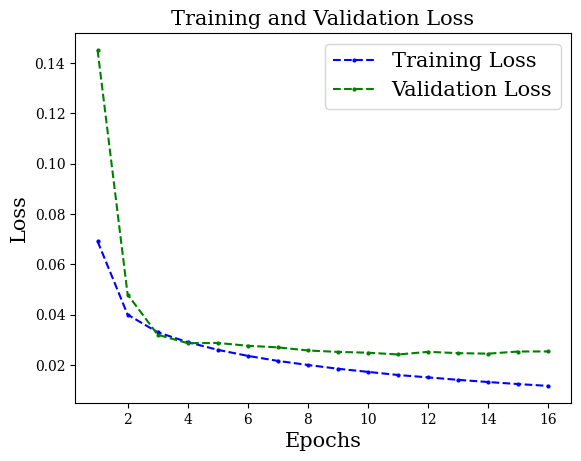

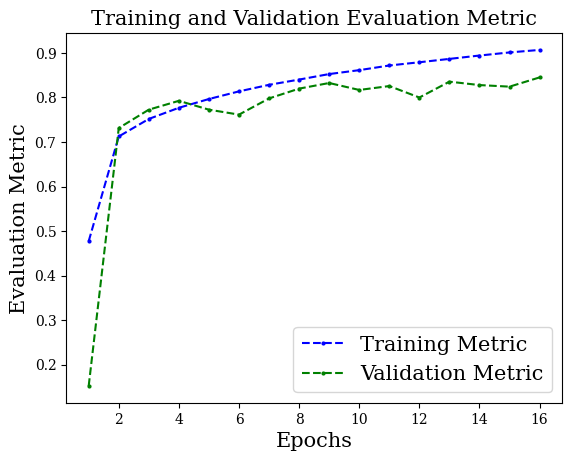

In [16]:
plot = plots(history, trained_results_directory)
loss_plot = plot.loss()
evaluation_metric_plot = plot.evaluation_metric()

In [17]:
# Save the model
print('Saving the model...')
model.model.save(os.path.join(trained_results_directory, 'model.h5'))

Saving the model...
